# Простая линейная регрессия (Simple Regression)

---

**Простой называют линейную регрессию, в модели которой число независимых переменных равно 1.**

---

$y=b_{0} + b_{1}x$

$y$ - зависимая переменная, что мы измеряем в эксперименте (dependent variable)

$x$ - независимая переменная (independent variable)

$b_{0}$ - показывает, чему равна зависимая переменная, если предиктор равен нулю (intercept)

$b_{1}$ - показывает, насколько изменяется зависимая переменная при изменении независимой переменной (coef | slope)

---

Параметр модели $b_{1}$ вычисляется при помощи метода наименьших квадратов (Ordinary Least Squares).

---

<center><img src="images/linear_regression_marks.png" alt="linear_regression_marks" width=500 height=500"/></center>

<center><img src="images/linear_regression.gif" alt="linear_regression" width=1500 height=1500"/></center>

## Импорт пакетов
- `matplotlib.pyplot` - рисование графиков
- `pandas` - работа с таблицами
- `numpy` - работа с матрицами

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

%matplotlib inline

## Загрузка данных

`FuelConsumption.csv` (Рейтинги расхода топлива):

[Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [2]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/FuelConsumptionCo2.csv")
df = pd.read_csv(data_csv)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Обучение модели (Train)

In [3]:
# разделить независимую и зависимую переменные / train и test

from sklearn.model_selection import train_test_split

Y = df['CO2EMISSIONS'].copy()
X = df[['ENGINESIZE']].copy()
#X = df.drop(['CO2EMISSIONS', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [4]:
# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# обучить модель
simple_regr.fit(X_train, y_train)

# вывести результаты обучения
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ',simple_regr.intercept_)

Coefficients:  [39.16827831]
Intercept:  126.0036091541026


## Визуализация результата обучения модели

Text(0, 0.5, 'Emission')

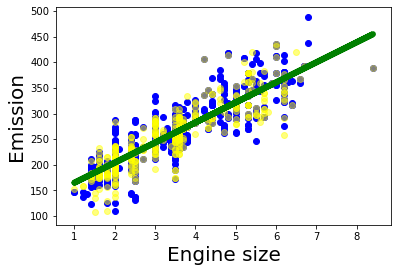

In [5]:
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)
plt.plot(X_train, 
        simple_regr.coef_[0]*X_train + simple_regr.intercept_, 
        '-g', 
        linewidth=6)
plt.xlabel("Engine size", fontsize=20)
plt.ylabel("Emission", fontsize=20)

## Оценка качества модели (Evaluation)

In [6]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(X_test)

# вывести результаты предсказания
print(f'Variance score: {simple_regr.score(X_test, y_test)}')    # Coefficient of determination R^2 of the prediction
print(f"Residual sum of squares: {np.mean((y_predicted - y_test) ** 2)}")    # MSE

Variance score: 0.7648412489948487
Residual sum of squares: 957.6303149019186


In [7]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predicted)    # эквивалентно simple_regr.score(X_test, y_test)

0.7648412489948487

In [8]:
from sklearn.metrics import mean_squared_error

# MSE
mean_squared_error(y_test, y_predicted, squared=True)   # эквивалентно np.mean((y_predicted - y_test) ** 2)

957.6303149019186